In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vis
from mpl_toolkits.mplot3d import Axes3D

# Preprocesamiento
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Metricas de evaluacion
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, recall_score, accuracy_score

Cargamos el dataset concatenado

In [6]:
df = pd.read_csv("../../data/csv/df_concat_a.csv")
df = df.drop(columns="Unnamed: 0")

Equilibramos las clases

In [3]:
# Oversampling
smote = SMOTE(random_state=16)

# Definimos target y predictoras
X = df.drop(columns=["sk_id_curr", "target"])
y = df["target"]

# Balanceamos las clases
X_balanced, y_balanced = smote.fit_resample(X, y)

Train test split

In [4]:
# Hacemos el train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.20, random_state=16)

# Instanciamos la regresion logística y la ajustamos
reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Hacemos predicciones en train y test
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

Evaluamos con reporte de clasificación, matriz de confusión, AUC-ROC y AUC-PR.

In [5]:
print("===============================================================")
# Calcular la matriz de confusión TRAIN
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de Confusión: TRAIN")
print()
print(conf_matrix_train)
print()
# Imprimir el informe de clasificación TRAIN
report_train = classification_report(y_train, y_pred_train)
print("Informe de Clasificación: TRAIN")
print(report_train)

# Calcular AUC-ROC / AUC-PR TRAIN
roc_train = roc_auc_score(y_train, y_pred_train)
pr_train = average_precision_score(y_train, y_pred_train)

print(f"AUC-ROC para TRAIN : {round(roc_train,3)}")
print(f"AUC-PR para TRAIN : {round(pr_train,3)}")


print("===============================================================")


# Calcular la matriz de confusión TEST
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión: TEST")
print()
print(conf_matrix_test)
print()
# Imprimir el informe de clasificación TEST
report_test = classification_report(y_test, y_pred_test)
print("Informe de Clasificación: TEST")
print(report_test)

# Calcular AUC-ROC / AUC-PR TEST
roc_test = roc_auc_score(y_test, y_pred_test)
pr_test = average_precision_score(y_test, y_pred_test)

print(f"AUC-ROC para TEST : {round(roc_test,3)}")
print(f"AUC-PR para TEST : {round(pr_test,3)}")

Matriz de Confusión: TRAIN

[[140195   5748]
 [ 31997 113898]]

Informe de Clasificación: TRAIN
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    145943
           1       0.95      0.78      0.86    145895

    accuracy                           0.87    291838
   macro avg       0.88      0.87      0.87    291838
weighted avg       0.88      0.87      0.87    291838

AUC-ROC para TRAIN : 0.871
AUC-PR para TRAIN : 0.853
Matriz de Confusión: TEST

[[35091  1365]
 [ 7984 28520]]

Informe de Clasificación: TEST
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     36456
           1       0.95      0.78      0.86     36504

    accuracy                           0.87     72960
   macro avg       0.88      0.87      0.87     72960
weighted avg       0.88      0.87      0.87     72960

AUC-ROC para TEST : 0.872
AUC-PR para TEST : 0.855


Graficamos AUC ROC y PR para train y test

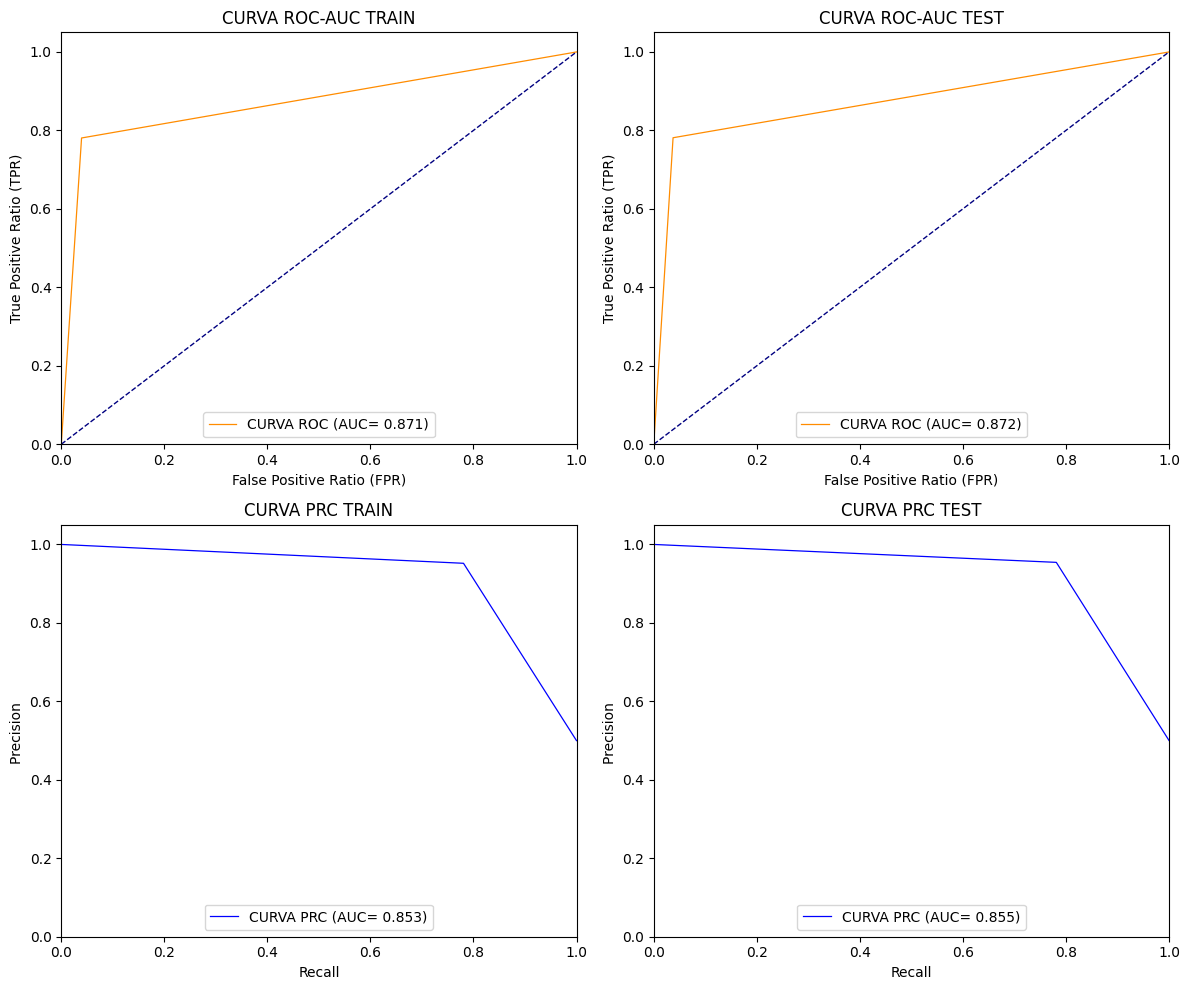

In [6]:
# Calculamos las tasas de falsos positivos (FPR) y de verdaderos positivos (TPR) para AUC-ROC


fpr_train, tpr_train, thresholds_roc_train = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, thresholds_roc_test = roc_curve(y_test, y_pred_test)

# Calculamos precision y recall para graficar AUC-PR

precision_train, recall_train, thresholds_prc_train = precision_recall_curve(
    y_train, y_pred_train)
precision_test, recall_test, thresholds_prc_test = precision_recall_curve(
    y_test, y_pred_test)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))


# AUC-ROC TRAIN
axs[0, 0].plot(fpr_train, tpr_train, color="darkorange", lw=0.9,
               label="CURVA ROC (AUC= %0.3f)" % roc_train)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel("False Positive Ratio (FPR)")
axs[0, 0].set_ylabel("True Positive Ratio (TPR)")
axs[0, 0].set_title("CURVA ROC-AUC TRAIN")
axs[0, 0].legend(loc="lower center")

# AUC-ROC TEST
axs[0, 1].plot(fpr_test, tpr_test, color="darkorange", lw=0.9,
               label="CURVA ROC (AUC= %0.3f)" % roc_test)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel("False Positive Ratio (FPR)")
axs[0, 1].set_ylabel("True Positive Ratio (TPR)")
axs[0, 1].set_title("CURVA ROC-AUC TEST")
axs[0, 1].legend(loc="lower center")

# AUC-PR TRAIN
axs[1, 0].plot(recall_train, precision_train, color="blue",
               lw=0.9, label="CURVA PRC (AUC= %0.3f)" % pr_train)
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel("Recall")
axs[1, 0].set_ylabel("Precision ")
axs[1, 0].set_title("CURVA PRC TRAIN")
axs[1, 0].legend(loc="lower center")

# AUC-PR TEST
axs[1, 1].plot(recall_test, precision_test, color="blue",
               lw=0.9, label="CURVA PRC (AUC= %0.3f)" % pr_test)
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel("Recall")
axs[1, 1].set_ylabel("Precision ")
axs[1, 1].set_title("CURVA PRC TEST")
axs[1, 1].legend(loc="lower center")

plt.tight_layout()
plt.show()

**Conexión a la aplicación**

In [7]:
# Recibe el registro desde la aplicación

In [8]:
new_row = X_balanced.sample(1)
new_row

,auto_propio,casa_depto_propio,quien_acompañó,dia_inicio_proceso,telefono_trabajo,telefono_casa,telefono_casa2,reg_residencia_diferente,reg_trabajo_diferente,city_residencia_diferente,...,monto_credito,edad_cliente,n_familiares,obs_30_circulo_social,solicitudes_al_bureau,n_hijos,ingresos_totales,prestamo_anual,precio_bienes,anios_empleado
250602,False,False,0,5,True,True,False,False,False,True,...,0.79975,-0.857138,3.0,0.0,1.0,1,-0.142532,1.450365,0.627003,-0.468441


In [9]:
# Guardamos el index del sample
indice = new_row.index
y_true_new = y_balanced.loc[indice]
y_true_new

250602    1
Name: target, dtype: int64

Estandarizar las variables numericas del nuevo registro a predecir

In [11]:
# Instanciamos el standar scaler
sc = StandardScaler()

# Aplicamos el standar scaler solo a las variables numericas

X_new_scaled = sc.fit

# Hacemos predicciones

y_pred_new = reg.predict(new_row)


# Devuelve el resultado de la predicción

print(f"Para el indice {indice}")


if y_pred_new == 0:

    print("Cliente sin riesgo de incumplimiento de pago")

else:

    print("Cliente riesgoso, no aprueba solicitud")

Para el indice Index([250602], dtype='int64')
Cliente riesgoso, no aprueba solicitud


Comparacion de la prediccion vs el target real

In [12]:
if y_pred_new != y_true_new.values:
    print("Fallo en la prediccion")
else:
    print("Prediccion acertada")

Prediccion acertada
